**Master Universitario en Bioinformática y Biología Computacional, UAM**
## **Minería de texto 2025-26**
# **Práctica de laboratorio 2: Word embeddings**

---

_Aviso_: algunas de las explicaciones y ejemplos de este notebook proceden de [Documentación de GenSim en NLTK](https://www.nltk.org/howto/gensim.html)

Antes de comenzar a trabajar, debemos configurar el entorno: 
- NLTK
- GenSim: permite trabajar con embeddings de palabras empleando Word2Vec, FastText y Doc2Vec.

Si no lo tenemos ya instalado, instalemos NLTK:

!pip install nltk

Ahora instalemos GenSim para poder trabajar con Word2Vec:

!pip install gensim

In [10]:
from nltk.test.gensim_fixt import setup_module
setup_module() # Puede que antes tengamos que ejecutar: !pip install pytest

Si no está ya instalado, descarguemos el corpus Brown de entre los disponibles en NLTK. Este es un corpus en inglés creado en 1961 en la Universidad de Brown. Cuenta con un millón de palabras con texto de 500 fuentes (noticias, editorial, etc.)

In [11]:
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to C:\Users\Daniel
[nltk_data]     Parra\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

Para probar, nos bastará con tomar 10000 oraciones del corpus.

In [12]:
from nltk.corpus import brown
train_set = brown.sents()[:10000]

Entrenamos el modelo empleando el Word2Vec de GenSim:

In [13]:
import gensim
model = gensim.models.Word2Vec(train_set)

Si se usa un corpus muy grande, puede llevar mucho tiempo entrenarlo. Lo más cómodo en esos casos es guardarlo y volver a cargarlo:

- `model.save('brown.embedding')` # para guardarlo

- `model = gensim.models.Word2Vec.load('brown.embedding')` # para recuperarlo

Veamos cuántas palabras contiene el modelo:

In [14]:
tot_palabras = model.corpus_total_words

print('El modelo contiene', tot_palabras, 'palabras.')

El modelo contiene 219770 palabras.


¿Cuáles son las 100 palabras más frecuentes?

In [16]:
top_freq_100 = model.wv.index_to_key[:100]

print('Las 100 palabras más frecuentes son:', top_freq_100)

Las 100 palabras más frecuentes son: ['the', ',', '.', 'of', 'and', 'to', 'a', 'in', 'is', 'that', 'for', '``', 'The', "''", 'was', 'as', 'on', 'with', 'be', 'it', 'by', 'at', 'he', 'his', 'are', ';', 'not', 'has', 'from', 'have', 'this', 'will', 'an', '--', 'which', 'who', '?', 'or', 'but', 'had', 'would', 'I', 'one', 'said', 'were', 'they', 'all', 'been', 'their', 'more', 'its', ':', ')', '(', 'He', 'Mr.', 'we', 'than', 'out', 'It', 'In', 'up', 'But', 'there', 'other', 'when', 'can', 'no', 'about', 'only', 'first', 'new', 'him', 'A', 'into', 'so', 'last', 'Mrs.', 'two', 'some', 'them', 'what', 'time', 'her', 'do', 'any', 'our', 'man', 'most', 'also', 'years', 'could', 'over', 'year', 'may', 'New', 'made', 'if', 'you', 'American']


Una vez entrenado, el modelo contendrá la lista de palabras en el vocabulario del corpus procesado, junto con el embedding correspondiente para cada palabra.

Puede obtenese el embedding de una palabra accediendo al diccionario `wv` (word vector) que tiene el modelo.

In [18]:
model.wv['university']

array([-0.03750352, -0.02959638,  0.04599334, -0.12272844, -0.01197707,
       -0.37941718,  0.12917198,  0.39836118, -0.00201809, -0.29719493,
       -0.05841578, -0.29607412, -0.15678604,  0.25538883,  0.01257014,
       -0.06038813,  0.05082484, -0.19893673,  0.04807821, -0.304222  ,
        0.08812822,  0.1571823 ,  0.37233847, -0.20819068,  0.02570725,
       -0.04859403, -0.14489044,  0.00426305, -0.1571453 , -0.00573442,
        0.12968695, -0.07610599,  0.08254329, -0.20086949, -0.1229815 ,
        0.12012698,  0.08240362, -0.16388173, -0.24466164, -0.14253879,
        0.10262216, -0.14742263, -0.20263867,  0.01358076,  0.0797544 ,
       -0.11570394, -0.25370464, -0.02527481,  0.15247992,  0.0887542 ,
       -0.00689664, -0.20290771,  0.06701357,  0.00181223,  0.00871151,
        0.12617914,  0.18857369, -0.11613555, -0.16956238,  0.03920743,
        0.00408527,  0.12499179,  0.10470787,  0.07069691, -0.1465801 ,
        0.31984243, -0.08597646,  0.22292724, -0.14871646,  0.03

y para calcular la similitud empleando la distancia coseno entre palabras:

In [20]:
model.wv.similarity('university','school')

0.99381924

Usando un modelo preentrenado. Podemos descargarlo, o emplear uno de los que tiene nltk:

In [22]:
nltk.download('word2vec_sample')

[nltk_data] Downloading package word2vec_sample to
[nltk_data]     C:\Users\Tania\AppData\Roaming\nltk_data...
[nltk_data]   Package word2vec_sample is already up-to-date!


True

Ahora podemos cargarlo:

In [15]:
from nltk.data import find

# fichero con los vectores en formato texto
word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))
model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)

Veamos cuáles son las 3 palabras más cercanas a 'university':

In [16]:
cerca_uni = model.most_similar(positive=['university'], topn = 3)

print('Las 3 palabras más cercanas a "university" son', cerca_uni)

Las 3 palabras más cercanas a "university" son [('universities', 0.7003918290138245), ('faculty', 0.6780906915664673), ('undergraduate', 0.6587096452713013)]


Obtenemos el vector de una palabra. Esta vez accesible directamente desde el modelo.

In [9]:
model['queen']  # Previamente cambiamos la variable "model" por ello si intentaramos ejecutar el mismo comando que anteriormene para "university":
                # model.wv['queen']
                # termina dando error

array([ 0.00173332, -0.0474043 , -0.022896  ,  0.0407935 ,  0.0435346 ,
       -0.0293455 , -0.0235409 , -0.0715902 , -0.0651406 ,  0.0183813 ,
       -0.0249921 , -0.125767  ,  0.0343439 , -0.00026957,  0.043857  ,
        0.0372462 ,  0.0240246 , -0.015479  ,  0.0217673 ,  0.0311192 ,
        0.0628833 ,  0.045147  , -0.0780398 , -0.0391811 ,  0.021606  ,
       -0.0175751 , -0.101903  ,  0.030313  ,  0.0622383 , -0.0551438 ,
       -0.0515965 , -0.0432121 , -0.0272494 ,  0.0703003 , -0.117382  ,
       -0.0435346 ,  0.0317641 ,  0.0870691 , -0.0312804 ,  0.0606259 ,
        0.0353114 , -0.137376  ,  0.089004  , -0.00915032,  0.0580461 ,
       -0.0372462 , -0.00136046,  0.0480493 ,  0.0515965 ,  0.0883591 ,
       -0.00592554,  0.0325703 ,  0.0174944 , -0.0103193 , -0.0538539 ,
       -0.0191875 , -0.113512  , -0.0570787 ,  0.03773   , -0.0298292 ,
        0.044502  ,  0.0922288 , -0.0164464 ,  0.0428896 ,  0.0580461 ,
       -0.0732026 , -0.0039302 ,  0.0464369 , -0.059981  ,  0.03

Juguemos un poco...

¿cuál es la palabra que no encaja en una lista dada?

In [30]:
model.doesnt_match(['breakfast', 'cereal', 'dinner', 'lunch'])

'cereal'

¿qué vector sale si hacemos `'woman'+'king'-'man'`?

In [32]:
pal_similar = model.most_similar(positive=['woman','king'], negative=['man'], topn = 1)

print('Si hacemos "woman"+"king"-"man" obtenemos la palabra', pal_similar[0][0], 'con una similitud de', pal_similar[0][1])

Si hacemos "woman"+"king"-"man" obtenemos la palabra queen con una similitud de 0.7118193507194519


¿y qué saldrá de la operación `man + daughter - woman`?

In [34]:
pal_similar = model.most_similar(positive=['man', 'daughter'], negative=['woman'], topn=1)

print('Si hacemos "man"+"daughter"-"woman" obtenemos la palabra', pal_similar[0][0], 'con una similitud de', pal_similar[0][1])

Si hacemos "man"+"daughter"-"woman" obtenemos la palabra son con una similitud de 0.8490632772445679


Ojo, lo que nos devuelve es el vector más próximo. Si, por ejemplo, queremos sacar los 3 vectores más próximos:

In [36]:
pal_similar = model.most_similar(positive=['woman','king'], negative=['man'], topn = 3)

print(f'Si hacemos "woman"+"king"-"man" obtenemos las palabras: {pal_similar[0][0]}, {pal_similar[1][0]} y {pal_similar[2][0]};\ncon una similitud de: {pal_similar[0][1]}, {pal_similar[1][1]} y {pal_similar[2][1]} correspondientemente.')

Si hacemos "woman"+"king"-"man" obtenemos las palabras: queen, monarch y princess;
con una similitud de: 0.7118193507194519, 0.6189674139022827 y 0.5902431011199951 correspondientemente.


Podemos explorar más ejemplos para obtener analogías semánticas menos evidentes.

In [38]:
analogias = [
    (['Paris','Japan'], ['France']),
    (['teacher','hospital'], ['school'])
]

for pos, neg in analogias:
    print(pos, '-', neg, '→', model.most_similar(positive=pos, negative=neg, topn=3))

['Paris', 'Japan'] - ['France'] → [('Tokyo', 0.8142859935760498), ('Osaka', 0.6350961327552795), ('Seoul', 0.6054926514625549)]
['teacher', 'hospital'] - ['school'] → [('Hospital', 0.6331107020378113), ('nurse', 0.6280134320259094), ('doctor', 0.5242676734924316)]


### Ejercicio 1: Visualización de relaciones semánticas de embeddings mediante PCA

Usando el modelo Word2Vec previamente cargado, selecciona varios conjuntos de palabras que incluyan diferentes relaciones semánticas:
- Género de varias palabras: masculino, femenino
- Varios países y sus capitales
- Grados de varios adjetivos: positivo, comparativo, superlativo
- Palabras de la varias temáticas, p. ej., alimentos, medios de transporte, etc.

Reduce sus embeddings a dos dimensiones mediante PCA (Principal Component Analysis) y representa gráficamente las posiciones relativas de los embeddings de las palabras en el plano.

Observa si el modelo organiza de forma coherente las palabras; por ejemplo, king–queen vs. ..., Paris–France vs. ..., good–better–best vs. ..., apple-banana-grape vs. ....

##### Discute brevemente los resultados.

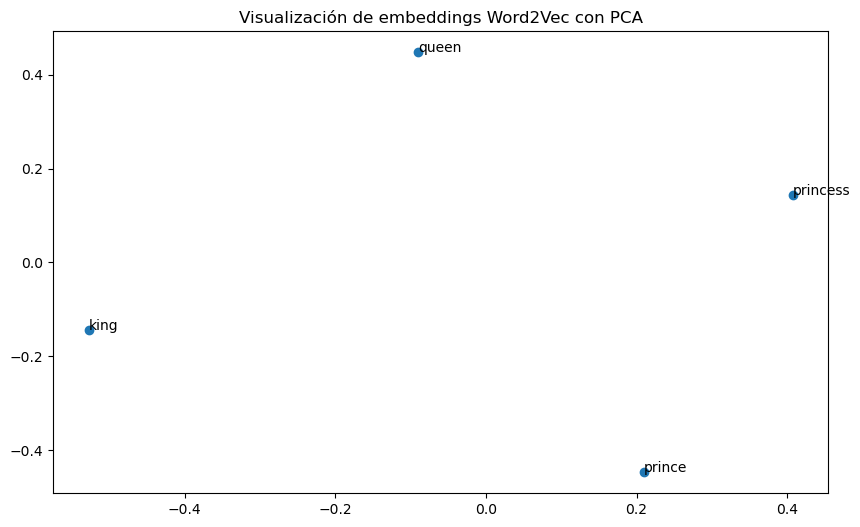

In [40]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Género
palabras = ['king', 'queen', 'prince', 'princess']   # No podemos utilizar 'emperor' y 'empress' porque no tiene la key "empress"
vectores = [model[i] for i in palabras]

# Reducimos a 2D con PCA 
pca = PCA(n_components=2)
coords = pca.fit_transform(vectores)

# Visualización
plt.figure(figsize=(10,6))
plt.scatter(coords[:,0], coords[:,1])
for i, palabra in enumerate(palabras):
    plt.annotate(palabra, (coords[i,0], coords[i,1]))
plt.title("Visualización de embeddings Word2Vec con PCA")
plt.show()


Podemos observar que al utilizar palabras del campo semántico de "familia real" `king`, `queen`, `prince` y `princess` obtenemos visualmente una relación semántica entre el género y el poder, dando lugar a una especie de paralelogramo.

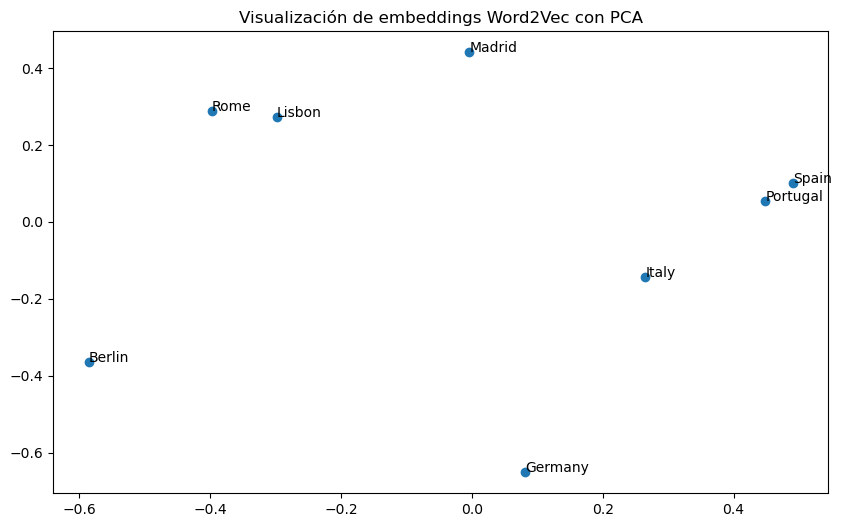

In [42]:
# Paises y capitales
palabras = ['Madrid', 'Spain', 'Rome', 'Italy', 'Berlin', 'Germany', 'Lisbon', 'Portugal']
vectores = [model[i] for i in palabras]

# Reducimos a 2D con PCA 
pca = PCA(n_components=2)
coords = pca.fit_transform(vectores)

# Visualización
plt.figure(figsize=(10,6))
plt.scatter(coords[:,0], coords[:,1])
for i, palabra in enumerate(palabras):
    plt.annotate(palabra, (coords[i,0], coords[i,1]))
plt.title("Visualización de embeddings Word2Vec con PCA")
plt.show()


Para los países y capitales también podemos observar una relación semantica, encontrándose las capitales superiores y hacia la izquierda de su país respectivo. Aunque no se forman líneas exactamente paralelas, es clara la relación semántica.

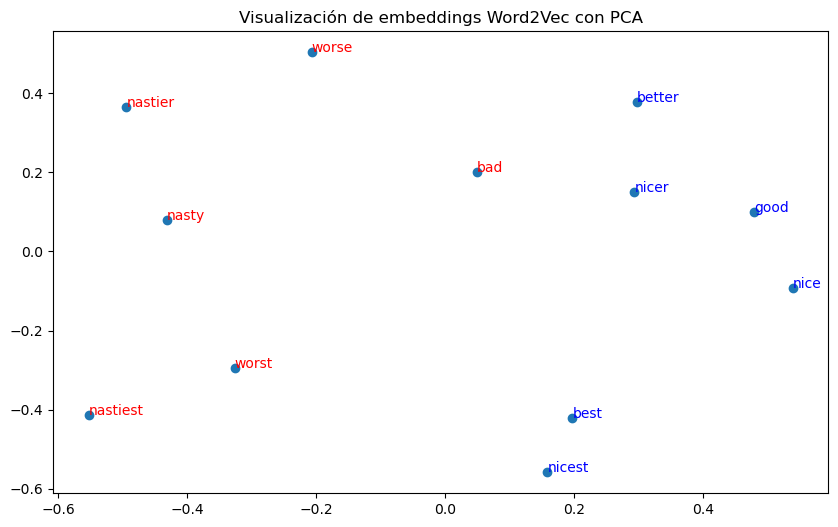

In [44]:
# Grados de varios adjetivos: positivo, comparativo, superlativo
palabras = ['good', 'better', 'best', 'nice', 'nicer', 'nicest', 'bad', 'worse', 'worst', 'nasty', 'nastier', 'nastiest']
vectores = [model[i] for i in palabras]

# Reducimos a 2D con PCA 
pca = PCA(n_components=2)
coords = pca.fit_transform(vectores)

# Visualización
plt.figure(figsize=(10,6))
plt.scatter(coords[:,0], coords[:,1])
count=0
for i, palabra in enumerate(palabras):
    count+=1
    if count > 6:
        color='red'
    else:
        color='blue'

    plt.annotate(palabra, (coords[i,0], coords[i,1]), color=color)
plt.title("Visualización de embeddings Word2Vec con PCA")
plt.show()


Podemos observar dos cosas en este plot:
- La primera es que **el mismo adjetivo** en positivo, comparativo y superlativo forma un triángulo, una estructura que vemos repetida para cada uno.
- La segunda es la **distribución de los adjetivos**. Hay una clara separación entre adjetivos con una connotación negativa (en rojo) y positiva (en azul), lo que también se traduce en una mayor proximidad entre aquellas palabras que comparten un significado negativo y aquellas con un significado positivo.

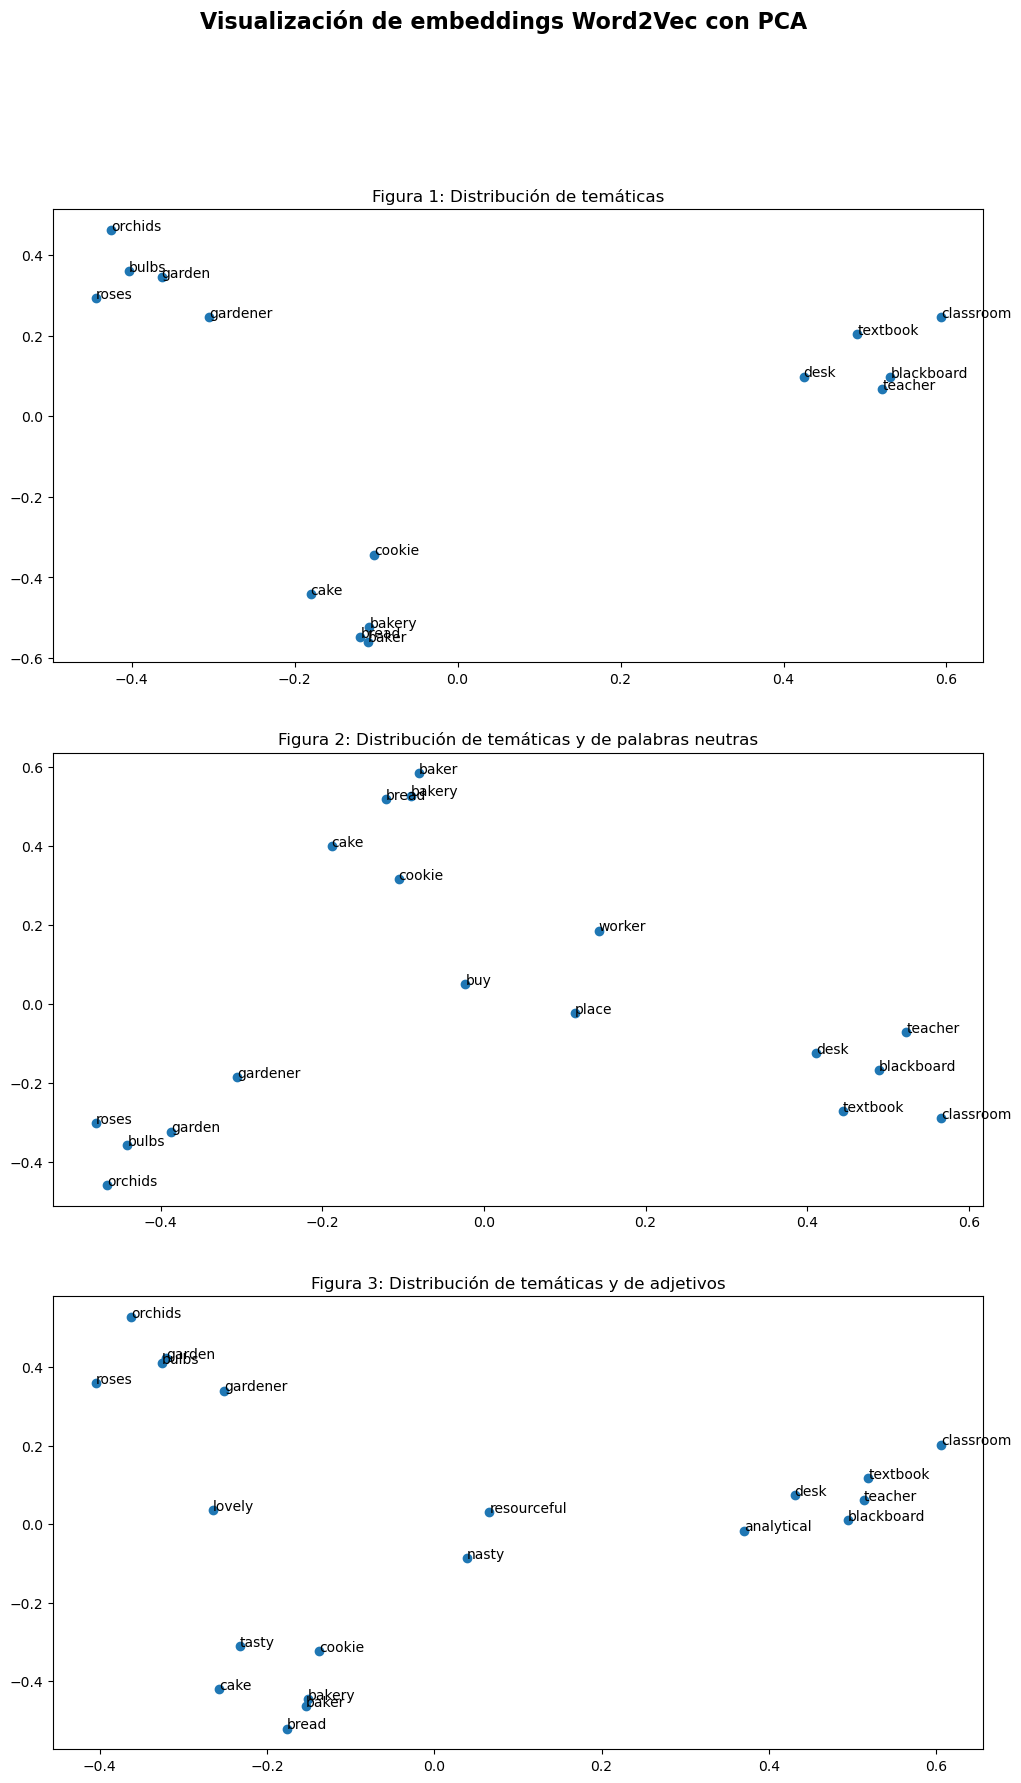

In [46]:
# Palabras de la varias temáticas
# Versión base
palabras1 = ['baker', 'bread', 'cookie', 'cake', 'bakery', 'gardener', 'roses', 'bulbs', 'orchids', 'garden', 'teacher', 'blackboard', 'textbook', 'desk', 'classroom']
vectores1 = [model[i] for i in palabras1]

# Reducimos a 2D con PCA 
pca = PCA(n_components=2)
coords1 = pca.fit_transform(vectores1)


# Versión con palabras de semántica compartida:
palabras2 = ['baker', 'bread', 'cookie', 'cake', 'bakery', 'gardener', 'roses', 'bulbs', 'orchids', 'garden', 'teacher', 'blackboard', 'textbook', 'desk', 'classroom', 'place', 'worker', 'buy']
vectores2 = [model[i] for i in palabras2]

# Reducimos a 2D con PCA 
pca = PCA(n_components=2)
coords2 = pca.fit_transform(vectores2)


# Versión con palabras de semántica compartida:
palabras3 = ['baker', 'bread', 'cookie', 'cake', 'bakery', 'gardener', 'roses', 'bulbs', 'orchids', 'garden', 'teacher', 'blackboard', 'textbook', 'desk', 'classroom', 'analytical', 'tasty', 'lovely', 'nasty', 'resourceful']
vectores3 = [model[i] for i in palabras3]

# Reducimos a 2D con PCA 
pca = PCA(n_components=2)
coords3 = pca.fit_transform(vectores3)

# Visualización
fig, axes = plt.subplots(3, 1, figsize=(12, 20))
fig.suptitle('Visualización de embeddings Word2Vec con PCA', fontsize=16, fontweight='bold')

# Gráfico base
ax1 = axes[0]
ax1.scatter(coords1[:,0], coords1[:,1])
for i, palabra in enumerate(palabras1):
    ax1.annotate(palabra, (coords1[i,0], coords1[i,1]))
ax1.set_title("Figura 1: Distribución de temáticas")

# Gráfico con palabras de semántica compartida
ax2 = axes[1]
ax2.scatter(coords2[:,0], coords2[:,1])
for i, palabra in enumerate(palabras2):
    ax2.annotate(palabra, (coords2[i,0], coords2[i,1]))
ax2.set_title("Figura 2: Distribución de temáticas y de palabras neutras")

# Gráfico con adjetivos
ax3 = axes[2]
ax3.scatter(coords3[:,0], coords3[:,1])
for i, palabra in enumerate(palabras3):
    ax3.annotate(palabra, (coords3[i,0], coords3[i,1]))
ax3.set_title("Figura 3: Distribución de temáticas y de adjetivos")

plt.show()


Para este apartado hemos utilizado por temátca:
- 1 profesión.
- 3 objetos relacionados con dicha profesión.
- 1 espacio en el que se desarrolle.

Al utilizar palabras de distintas temáticas podemos observar como tienden a formar clusters, permitiendo una clara diferenciación entre campos semánticos (**Figura 1**). 

No obstante, hay que tener cuidado con palabras que puedan ser neutras/pertenecer a varios campos semánticos como `buy`, `place` y `worker` ya que estas se colocarían en zonas más centrales (**Figura 2**).

Además, podemos jugar con ello y observar qué adjetivos se asocian más con qué profesión como `tasty`, `analytical` y `lovely`; que se corresponden con las temáticas de panadería, enseñanza y jardinería respectivamente. A su vez vemos como otros adjetivos son neutros como `resourceful` y `nasty` (**Figuara 3**).


### Ejercicio 2: Valoración de sesgos en embeddings

Usando el modelo Word2Vec cargado, analiza posibles sesgos de género midiendo qué tan similares son ciertas profesiones a las palabras "man" y "woman".

Selecciona una lista de profesiones (p. ej., "doctor", "nurse", "engineer", "teacher", "secretary", "scientist", "housekeeper") y calcula su similitud con ambas palabras.

Observa si el modelo asocia algunas profesiones más fuertemente con "man" o con "woman", lo que podría indicar un sesgo aprendido a partir del corpus de entrenamiento.

##### Discute brevemente los resultados.

In [49]:
profesiones = ['doctor', 'nurse', 'engineer', 'teacher', 
               'secretary', 'scientist', 'housekeeper']

print("Análisis de sesgos de género en profesiones:\n")
print(f"{'Profesión':<15} {'Sim. man':<12} {'Sim. woman':<12} {'Diferencia: man-woman':<16}")
print("-" * 65)

for profesion in profesiones:
    if profesion in model:
        sim_man = model.similarity(profesion, 'man')
        sim_woman = model.similarity(profesion, 'woman')
        diferencia = sim_man - sim_woman
        
        print(f"{profesion:<15} {sim_man:>10.4f}  {sim_woman:>10.4f}  {diferencia:>15.4f}")

Análisis de sesgos de género en profesiones:

Profesión       Sim. man     Sim. woman   Diferencia: man-woman
-----------------------------------------------------------------
doctor              0.3145      0.3795          -0.0650
nurse               0.2547      0.4414          -0.1866
engineer            0.1513      0.0944           0.0569
teacher             0.2500      0.3136          -0.0636
secretary           0.0400      0.0905          -0.0505
scientist           0.1582      0.1549           0.0034
housekeeper         0.3334      0.4766          -0.1432


Se pueden observar sesgos de género aprendidos del corpus:
- La profesión de 'engineer' suele tener mayor similitud con 'man'.
- Profesiones como 'nurse', 'secretary' y 'housekeeper' suelen tener mayor similitud con 'woman'.

No obstante, para scientist la similitud es muy similar para ambos géneros, con una diferencia superior en los hombres de 3.4 milésimas.

Esto refleja la presencia de estereotipos en los textos utilizados de entrenamiento.

### Ejercicio 3: Representación de una oración mediante un embedding

Implementa una función `embedding_oracion` que obtenga el vector representativo de una oración calculando el promedio (p. ej., usando `mean` de `numpy`) de los embeddings de sus palabras.

Usa esta función para comparar varias oraciones y medir su similitud semántica mediante la distancia coseno (`model.cosine_similarities`) entre sus embeddings.

Observa si oraciones con significados parecidos (p. ej., "The cat sat on the mat" y "A dog rested on the rug") presentan una similitud mayor que las que hablan de temas distintos (p. ej., "I like pizza and pasta").

##### Discute brevemente los resultados.

In [52]:
# Cargamos los paquetes necesarios
import numpy as np

In [53]:
def embedding_oracion(oracion):
    """
    Calcula el embedding de una oración promediando los embeddings 
    de las palabras que la componen.
    """
    palabras = oracion.lower().split()
    vectores_palabras = []
    
    for palabra in palabras:
        if palabra in model:
            vectores_palabras.append(model[palabra])
    
    if len(vectores_palabras) == 0:
        return np.zeros(model.vector_size)
    
    return np.mean(vectores_palabras, axis=0)

In [54]:
# Calculamos la similitud para las oraciones indicadas
o1 = "The cat sat on the mat"
o2 = "A dog rested on the rug"
o3 = "I like pizza and pasta"


# Oraciones originales
sim_1_2 = model.cosine_similarities(embedding_oracion(o1), [embedding_oracion(o2)])[0]
sim_1_3 = model.cosine_similarities(embedding_oracion(o1), [embedding_oracion(o3)])[0]
sim_2_3 = model.cosine_similarities(embedding_oracion(o2), [embedding_oracion(o3)])[0]


# Oraciones nuevas
o4 = "My dog likes meat"  # Para probar la primera persona con perro y con comida
o5 = "I sit on a chair"   # Para probar la primera persona y sentarse

sim_1_4 = model.cosine_similarities(embedding_oracion(o1), [embedding_oracion(o4)])[0]
sim_1_5 = model.cosine_similarities(embedding_oracion(o1), [embedding_oracion(o5)])[0]


sim_2_4 = model.cosine_similarities(embedding_oracion(o2), [embedding_oracion(o4)])[0]
sim_2_5 = model.cosine_similarities(embedding_oracion(o2), [embedding_oracion(o5)])[0]


sim_3_4 = model.cosine_similarities(embedding_oracion(o3), [embedding_oracion(o4)])[0]
sim_3_5 = model.cosine_similarities(embedding_oracion(o3), [embedding_oracion(o5)])[0]


sim_4_5 = model.cosine_similarities(embedding_oracion(o4), [embedding_oracion(o5)])[0]


print("\nSimilitud entre oraciones originales:")
print(f"Similitud o1-o2: {sim_1_2:.3f}")
print(f"Similitud o1-o3: {sim_1_3:.3f}")
print(f"Similitud o2-o3: {sim_2_3:.3f}")


print("\nSimilitud entre oraciones originales y oraciones nuevas:")
print(f"Similitud o1-o4: {sim_1_4:.3f}")
print(f"Similitud o1-o5: {sim_1_5:.3f}")

print(f"Similitud o2-o4: {sim_2_4:.3f}")
print(f"Similitud o2-o5: {sim_2_5:.3f}")

print(f"Similitud o3-o4: {sim_3_4:.3f}")
print(f"Similitud o3-o5: {sim_3_5:.3f}")

print(f"Similitud o4-o5: {sim_4_5:.3f}")


Similitud entre oraciones originales:
Similitud o1-o2: 0.839
Similitud o1-o3: 0.230
Similitud o2-o3: 0.270

Similitud entre oraciones originales y oraciones nuevas:
Similitud o1-o4: 0.429
Similitud o1-o5: 0.605
Similitud o2-o4: 0.524
Similitud o2-o5: 0.559
Similitud o3-o4: 0.526
Similitud o3-o5: 0.439
Similitud o4-o5: 0.350


Respecto a las oraciones originales podemos observar que la similitud entre o1 y o2 (`0.839`) es mayor que entre o1 y o3; y o2 y o3 (`0.230` y `0.270` respectivamente),  ya que o1 y o2 hablan de animales descansando en superficies mientras que la oración o3 trata un tema completamente diferente (un tipo de comida que le gusta comer al sujeto).

Sobre la similitud con las oraciones nuevas, podemos apreciar como o4 es más similar a o3 (`0.526`), superando por dos milésimas a o2 (`0.524`) y para o5 es más similar o1 que o2 por 46 milésimas (`0.605` y `0.559` respectivamente). Estas diferencias tan pequeñas seguramente se deban a que las oraciones nuevas tratan temas que interseccionan la semántica de las otras dos oraciones. Finalmente la similitud entre las oraciones nuevas es baja (`0.350`) lo que sugiere que no son muy similares pero sí más que las comparaciones de las oraciones o1-o3 y o2-o3.

### Ejercicio 4: Medida de la coherencia semántica de una oración

Implementa una función `coherencia_oracion` que calcule la coherencia semántica de una oración midiendo la similitud promedio entre los embeddings de palabras consecutivas.

Aplica la función a oraciones con sentido ("the cat sat on the mat") y a oraciones absurdas ("the banana drove a spaceship") para observar cómo varía el nivel de coherencia calculado por el modelo.

##### Discute brevemente los resultados.

In [57]:
def coherencia_oracion(oracion):
    """
    Calcula la coherencia semántica midiendo la similitud promedio
    entre palabras consecutivas.
    """
    palabras  = oracion.split()
    similitudes = []

    for i in range(len(palabras) - 1):
        palabra1 = palabras[i]
        palabra2 = palabras[i+1]

        # Verificamos que, en caso de que o esté la palabra en el modelo, aparezca su minúscula
        if palabra1 not in model and palabra1.lower() in model:
            palabra1 = palabra1.lower()
        if palabra2 not in model and palabra2.lower() in model:
            palabra2 = palabra2.lower()

        # Verificamos que existan ambas palabras para relizar el sumatorio
        if (palabra1 in model) and (palabra2 in model):
            sim = model.cosine_similarities(model[palabra1], [model[palabra2]])[0]
            similitudes.append(sim)

    if not similitudes:
        return 0.0

    similitudes = np.mean(similitudes)

    return similitudes

In [ ]:
# Probar con oraciones coherentes y absurdas
print("\nCoherencia semántica de oraciones:")
print(f"'the cat sat on the mat': {coherencia_oracion('the cat sat on the mat'):.3f}")
print(f"'the banana drove a spaceship': {coherencia_oracion('the banana drove a spaceship'):.3f}")

# Probamos con otras oraciones nuestras
print("\nCoherencia semántica de oraciones nuevas:")
## Primero: con una oración corta y después con variaciones de su longitud
print(f"'I drink coffee': {coherencia_oracion('I drink coffee'):.3f}")
print(f"'I drink': {coherencia_oracion('I drink'):.3f}")
print(f"'I like to drink hot coffee': {coherencia_oracion('I like to drink hot coffee'):.3f}")

## Segundo: con una oración en la que sólo varía el momento
print(f"'I drink coffee at breakfast': {coherencia_oracion('I drink coffee at breakfast'):.3f}")
print(f"'I drink coffee at lunch': {coherencia_oracion('I drink coffee at lunch'):.3f}")
print(f"'I drink coffee at dinner': {coherencia_oracion('I drink coffee at dinner'):.3f}")

## Tercero: versiones absurdas de esa oración
print(f"'I drink coffee with ketchup': {coherencia_oracion('I drink coffee with ketchup'):.3f}")
print(f"'I drink coffee with a fork': {coherencia_oracion('I drink coffee with a fork'):.3f}")
print(f"'I drink coffee like a dog with a hat': {coherencia_oracion('I drink coffee like a dog with a hat'):.3f}")


Coherencia semántica de oraciones:
'the cat sat on the mat': 0.163
'the banana drove a spaceship': 0.111

Coherencia semántica de oraciones nuevas:
'I drink coffee': 0.288
'I drink': 0.132
'I like to drink hot coffee': 0.287
'I drink coffee at breakfast': 0.213
'I drink coffee at lunch': 0.226
'I drink coffee at dinner': 0.214
'I drink coffee with ketchup': 0.164
'I drink coffee with a fork': 0.197
'I drink coffee like a dog with a hat': 0.192


Podemos observar que la oración coherente muestra mayor similitud (0.163 vs 0.111), confirmando que palabras contextualmente relacionadas tienen embeddings más cercanos.

Respepcto a la coherencia en oraciones nuevas, en la longitud de las oraciones, podemos observar que las oraciones más largas tiene coherencia similar (promedio de más pares de palabras). Sobre la variación temporal, podemos ver que las diferencias son pequeñas pero consistentes, pudiendo tener "lunch" mayor similitud con "coffee" en los embeddings. Respecto a las oraciones absurdas, vemos que **todas** las absurdas (0.164-0.192) tienen coherencia **menor** que la oración coherente original (0.288). Las pequeñas variaciones se deben a qué tan relacionadas están las palabras individuales (ej: "fork" y "drink" pueden tener embeddings más próximos que "ketchup").

### Ejercicio 5: Análisis de la reciprocidad entre vecinos semánticos

Implementa una función `vecinos_reciprocos` que evalúe si la relación de similitud entre palabras es recíproca: es decir, si una palabra A considera a B como uno de sus vecinos más cercanos, y B también considera a A dentro de sus vecinos.

Aplica esta función a varias palabras y calcula el porcentaje de vecinos recíprocos para cada una.

##### Reflexiona sobre los resultados y qué pueden revelar acerca de la estructura del espacio de embeddings y las asimetrías en las relaciones de similitud.

Para este ejercicio hemos hecho dos interpretaciones:
- La primera, `vecinos_reciprocos`, calcula el porcentaje de verdaderos vecinos recíprocos de una palabra, permitiendo pasarle una lista de palabras para indexarla y calcular el porcentaje para cada una.
- La segunda, `vecinos_reciprocos_en_una_lista`, calcula el porcentaje de vecinos recíprocos que hay en una lista predeterminada por el usuario para la palabra de interés. Como en el caso anterior también se le puede pasar una lista de palabras para indexarla y calcular el porcentaje para cada una de esas palabras respecto a la lista de interés.

In [17]:
def vecinos_reciprocos(palabra, topn=5):
    """
    Calcula qué proporción de los vecinos más cercanos de una palabra
    también consideran a esa palabra como uno de sus vecinos cercanos.
    """
    if palabra not in model:
        return 0.0
    
    # Obtenemos vecinos de la palabra
    vecinos = [v[0] for v in model.most_similar(palabra, topn=topn)]
    
    reciprocos = 0
    for vecino in vecinos:
        # Obtenemos vecinos del vecino
        vecinos_del_vecino = [v[0] for v in model.most_similar(vecino, topn=topn)]
        
        # Comprobamos si la palabra original está entre ellos
        if palabra in vecinos_del_vecino:
            reciprocos += 1
    
    return reciprocos / len(vecinos)

In [18]:
# Probamos con diferentes palabras
print("\nReciprocidad de vecinos semánticos:")
for w in ['king', 'queen', 'loyal', 'dog', 'puppy', 'music']:
    porcentaje = vecinos_reciprocos(w) * 100
    print(f"{w}: {porcentaje:.1f}% de vecinos son recíprocos")


Reciprocidad de vecinos semánticos:
king: 100.0% de vecinos son recíprocos
queen: 100.0% de vecinos son recíprocos
loyal: 80.0% de vecinos son recíprocos
dog: 100.0% de vecinos son recíprocos
puppy: 100.0% de vecinos son recíprocos
music: 40.0% de vecinos son recíprocos


**Reciprocidad entre vecinos naturales**

Estos resultados nos muestran variabilidad en la reciprocidad. Así, podemos observar una alta reciprocidad (100%) en las palabras king, queen, dog y puppy. Esto puede ser debido a que estas palabras pertenecen a campos semánticos cohesionados (realeza, animales domésticos) donde las relaciones son simétricas y bidireccionales. Los vecinos forman "clusters" cerrados en el espacio de embeddings.
También encontramos una reciprocidad media-baja (80%, 40%) en palabras como loyal y music. Esto puede deberse a asimetrías de frecuencia, es decir, palabras menos frecuentes pueden considerar vecina a una más común, pero no al revés (la común tiene muchas opciones). También puede deberse a la polisemia. Por ejemplos, music tiene múltiples contextos (género, sonido, arte), lo que dispersa su vecindario, a jerarquiías semánticas (relaciones hiperónimo-hipónimo no son simétricas) o al valor de topn limitado con topn=5 (solo se consideran 5 vecinos). Aumentar este valor podría revelar más reciprocidad latente.

In [27]:
# Otra interpretación del enunciado
def vecinos_reciprocos_en_una_lista(palabra, lista, topn=5):
    """
    Calcula qué proporción de las palabras de 'lista' que son vecinas de 'palabra'
    también consideran a 'palabra' como vecina (reciprocidad).
    """
    if palabra not in model:
        return 0.0
    
    vecinos_reales = [v[0] for v in model.most_similar(palabra, topn=topn)]
    
    candidatos = [v for v in lista if v != palabra and v in vecinos_reales and v in model]
    
    if not candidatos:
        return 0.0
    
    reciprocos = 0
    for vecino in candidatos:
        vecinos_del_vecino = [v[0] for v in model.most_similar(vecino, topn=topn)]
        if palabra in vecinos_del_vecino:
            reciprocos += 1
    
    return reciprocos / len(candidatos)

# Probamos con diferentes palabras
print("\nReciprocidad de vecinos semánticos:")
palabras = ['king', 'queen', 'loyal', 'dog', 'puppy', 'music']
lista = ['emperor', 'prince', 'friend', 'pet', 'artist']

for palabra in palabras:
    porcentaje = vecinos_reciprocos_en_una_lista(palabra, lista)
    print(f"{palabra}: {porcentaje:.1f}% de vecinos son recíprocos")


Reciprocidad de vecinos semánticos:
king: 1.0% de vecinos son recíprocos
queen: 0.0% de vecinos son recíprocos
loyal: 0.0% de vecinos son recíprocos
dog: 1.0% de vecinos son recíprocos
puppy: 1.0% de vecinos son recíprocos
music: 0.0% de vecinos son recíprocos


En este caso podemos observar que los porcentajes son muy bajos (0-0.1%). Esto no indica que es difícil encontrar reciprocidad cuando la lista es arbitraria y no refleja un campo semántico coherente. Las palabras de la lista (emperor, prince, friend, pet, artist) pueden no tener entre sus top-N como vecinos a las palabras de interés con topn=5.

Para obtener resultados más interesantes, se podrían usar listas temáticamente relacionadas (ej: todas palabras de realeza, o todas palabras de música) como se muestra a continuación:

In [28]:
# Probar con palabras temáticamente relacionadas
print("\nReciprocidad de vecinos semánticos:")
palabras = ['king', 'queen', 'loyal', 'dog', 'puppy', 'music']
lista = ['duke', 'prince', 'princess', 'monarch', 'lord']

for palabra in palabras:
    porcentaje = vecinos_reciprocos_en_una_lista(palabra, lista)
    print(f"{palabra}: {porcentaje:.1f}% de vecinos son recíprocos")


Reciprocidad de vecinos semánticos:
king: 1.0% de vecinos son recíprocos
queen: 1.0% de vecinos son recíprocos
loyal: 0.0% de vecinos son recíprocos
dog: 0.0% de vecinos son recíprocos
puppy: 0.0% de vecinos son recíprocos
music: 0.0% de vecinos son recíprocos


En este caso se pierde el porcentaje para dog pero aumenta el de queen.

También podemos probar a aumentar el topn y observar el efecto que tiene en los porcentajes. Lo esperado sería observar una disminución en los porcentajes calculados por la primera función y un aumento en los de la segunda.

In [29]:
# Probamos con un topn = 20
print("\nReciprocidad de vecinos semánticos:")
palabras = ['king', 'queen', 'loyal', 'dog', 'puppy', 'music']
lista = ['emperor', 'prince', 'friend', 'pet', 'artist']

for palabra in palabras:
    porcentaje_lista = vecinos_reciprocos_en_una_lista(palabra, lista, 20)
    porcentaje_propio = vecinos_reciprocos(palabra, 20) * 100
    print(f"Para la palabra {palabra}:\n - {porcentaje_propio:.1f}% de sus vecinos son recíprocos\n - {porcentaje_lista:.1f}% de los vecinos son recíprocos respecto a las palabras de la lista")


Reciprocidad de vecinos semánticos:
Para la palabra king:
 - 80.0% de sus vecinos son recíprocos
 - 1.0% de los vecinos son recíprocos respecto a las palabras de la lista
Para la palabra queen:
 - 95.0% de sus vecinos son recíprocos
 - 1.0% de los vecinos son recíprocos respecto a las palabras de la lista
Para la palabra loyal:
 - 45.0% de sus vecinos son recíprocos
 - 0.0% de los vecinos son recíprocos respecto a las palabras de la lista
Para la palabra dog:
 - 100.0% de sus vecinos son recíprocos
 - 1.0% de los vecinos son recíprocos respecto a las palabras de la lista
Para la palabra puppy:
 - 100.0% de sus vecinos son recíprocos
 - 1.0% de los vecinos son recíprocos respecto a las palabras de la lista
Para la palabra music:
 - 60.0% de sus vecinos son recíprocos
 - 0.0% de los vecinos son recíprocos respecto a las palabras de la lista


Efectivamente, aumentando la cantidad de posibles vecinos a 20 palabras, los porcentajes obtenidos con la función `vecinos_reciprocos` disminuyen, por ejemplo, para king desciende de un 100% a un 80%; aunque también nos podemos encontrar con casos contrarios, como ocurre con music, cuyo porcentaje de vecinos recíprocos aumenta de un 40% a un 60%. Esto sugiere que existen vecinos recíprocos para algunas palabras, pero que no se encuentran entre los más cercanos.

Por otra parte, los porcentajes obtenidos mediante la función `vecinos_reciprocos_en_una_lista` no tienen su valor superior a 1.0%, no obstante, nos encontramos con casos como el de queen, cuyo porcentaje de reciprocidad aumenta de 0.0% a 1.0%. Esto recalca las conclusiones anteriores de la existencia de vecinos recíprocos no muy cercanos a la palabra de interés y la necesidad de utilizar listas más extensas y que puedan tener una relación temática.

---

# Autores

- Tania Gonzalo Santana
- Daniel Parra Gutiérrez